In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import msgpack
import sys
import os

In [2]:
# Functions to compute the velocity profile and its derivative

# Compute the velocity profile using 2nd order finite difference method
def velocity_profile(nu, u_t, h, n_points, n_iterations):
    dy = h / (n_points - 1)
    dt = 0.001

    # Initialize velocity and position arrays
    u = np.zeros(n_points)
    y = np.linspace(0, h, n_points)

    # Set boundary conditions
    u[0] = 0  # Bottom velocity
    u[-1] = u_t  # Top velocity

    # Iterate using 3rd order Runge-Kutta method
    for _ in range(n_iterations):
        k1 = dt * derivative(nu, u, dy)
        k2 = dt * derivative(nu, u + k1 / 2, dy)
        k3 = dt * derivative(nu, u - k1 + 2 * k2, dy)
        u += (k1 + 4 * k2 + k3) / 6

    return y, u

# Compute velocity profile derivative
def derivative(nu, u, dy):
    du_dy = np.zeros_like(u)

    for i in range(1, len(u) - 1):
        du_dy[i] = (u[i+1] - 2 * u[i] + u[i-1]) / (dy ** 2)

    du_dy *= nu

    return du_dy


In [3]:
# Read parameters from text file
os.chdir('./data')
with open('parameters.txt', 'r') as file:
    h = float(file.readline())
    u_t = float(file.readline())
    nu = float(file.readline())
os.chdir('../')

In [4]:
pwd

'/home/krzysztof/python/projekt'

In [7]:
os.system('mkdir results')
os.chdir('./results')

In [8]:
pwd

'/home/krzysztof/python/projekt/results'

In [9]:
# Compute the analytical solution
n_points = 100
y_a = np.linspace(0, h, n_points)
u_a = u_t * y_a / h

In [10]:
# List numbers of iterations to run 
iterations_list = range(1000, 11000, 1000)

# Create a list to store results
results_list = []

In [11]:

# Perform simulations for each number of iterations
for n_iterations in iterations_list:
    # Compute the velocity profile
    y, u = velocity_profile(nu, u_t, h, n_points, n_iterations)

    # Compute deviation from the analytical solution
    deviation = u - u_a

    # Append results to the list
    results = {
        'n_iterations': n_iterations,
        'y': y.tolist(),
        'u': u.tolist(),
        'deviation': deviation.tolist()
    }
    results_list.append(results)
    
    # Export the results to a .dat file using msgpack
    results = {
        'y': y.tolist(),
        'numerical_u': u.tolist(),
        'analytical_u': u_a.tolist(),
        'deviation': deviation.tolist()
    }

    filename = f'results_{n_iterations}.dat'
    with open(filename, 'wb') as file:
        packed = msgpack.packb(results)
        file.write(packed)

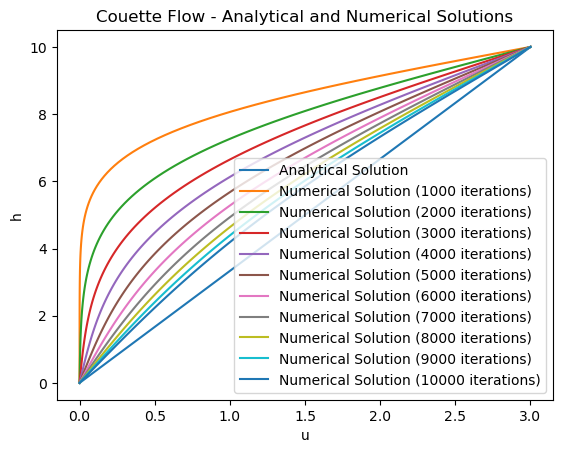

In [12]:
# Plot the analytical and numerical solutions
plt.figure(1)
plt.plot(u_a, y_a, label='Analytical Solution')
for results in results_list:
    plt.plot(results['u'], results['y'], label=f'Numerical Solution ({results["n_iterations"]} iterations)')
plt.xlabel('u')
plt.ylabel('h')
plt.title('Couette Flow - Analytical and Numerical Solutions')
plt.legend()

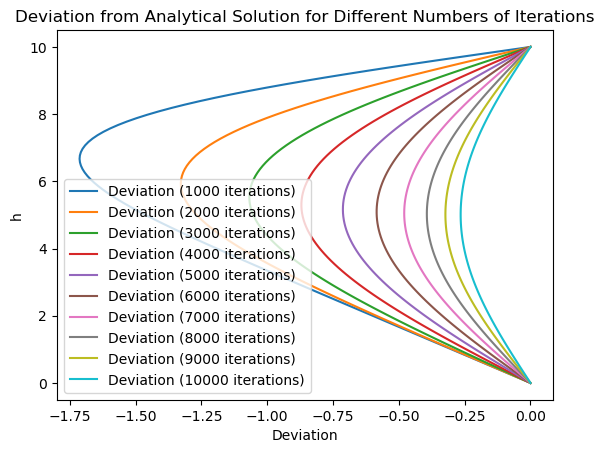

In [13]:
# Plot the deviations for each number of iterations
plt.figure(2)
for results in results_list:
    plt.plot(results['deviation'], results['y'], label=f'Deviation ({results["n_iterations"]} iterations)')
plt.xlabel('Deviation')
plt.ylabel('h')
plt.title('Deviation from Analytical Solution for Different Numbers of Iterations')
plt.legend()